# Importation des bibleothéques 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import h5py
from tensorflow import keras

In [4]:
def load_data():
    train_dataset = h5py.File('data/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('data/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train

In [6]:
X_train, y_train= load_data()
X_test,y_test=load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)

(1000, 64, 64)
(1000, 64, 64)


C:\Users\user\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


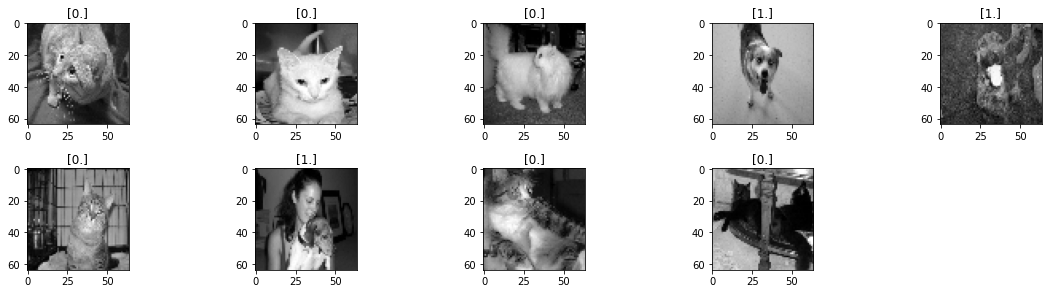

In [8]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [ ]:
#from keras.datasets import mnist
#from keras.models import Sequential
#from keras.layers import Conv2D
#from keras.layers import MaxPooling2D
#from keras.layers import Dense
#from keras.layers import Flatten
#from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#import  keras.utils
#from keras.utils.np_utils import to_categorical

In [ ]:
#width, height, channels = X_train.shape[1], X_train.shape[2], 1
#trainX = X_train.reshape((X_train.shape[0], width, height, channels))

In [ ]:
#trainY = to_categorical(y_train)

In [ ]:
#print('Train min=%.3f, max=%.3f' % (trainX.min(), trainX.max()))

In [ ]:
#datagen =ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
#train_iterator = datagen.flow(trainX, trainY, batch_size=64)

In [ ]:
#print('Batches train=%d' % (len(train_iterator)))
     

In [ ]:
#batchX, batchy = train_iterator.next()

In [ ]:
#print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [ ]:
#model = Sequential()
#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dense(10, activation='softmax'))

In [ ]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=5)


In [ ]:
#acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
#print('Test Accuracy: %.3f' % (acc * 100))

In [9]:
# Normalisations 
X_train = X_train / 255
X_test=X_test/255

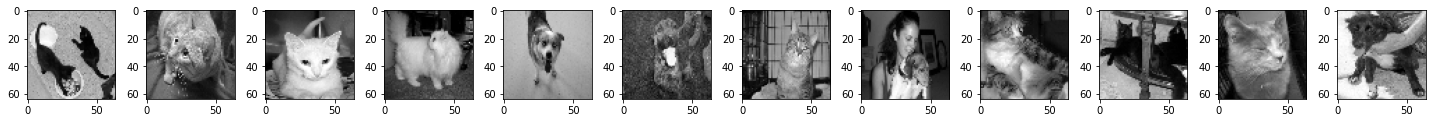

In [25]:
# visualisation de quelques images
fig, ax = plt.subplots(nrows=1, ncols=12, figsize=(20, 4))
for i in range(12):
  ax[i].imshow(X_train[i], cmap='gray')

plt.tight_layout()
plt.show()

In [11]:
# Configuration des couches du réseau
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [19]:
# Compilation du modele
model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrainement du modele
model.fit(X_train, y_train, epochs=14)

Epoch 1/14
32/32 [==============================] - 1s 8ms/step - loss: 0.6937 - accuracy: 0.8190
Epoch 2/14
32/32 [==============================] - 0s 8ms/step - loss: 0.0816 - accuracy: 0.9680
Epoch 3/14
32/32 [==============================] - 0s 8ms/step - loss: 0.0296 - accuracy: 0.9950
Epoch 4/14
32/32 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.9910
Epoch 5/14
32/32 [==============================] - 0s 8ms/step - loss: 0.0333 - accuracy: 0.9920
Epoch 6/14
32/32 [==============================] - 0s 8ms/step - loss: 0.0363 - accuracy: 0.9910
Epoch 7/14
32/32 [==============================] - 0s 8ms/step - loss: 0.0209 - accuracy: 0.9970
Epoch 8/14
32/32 [==============================] - 0s 8ms/step - loss: 0.0200 - accuracy: 0.9960
Epoch 9/14
32/32 [==============================] - 0s 8ms/step - loss: 0.0228 - accuracy: 0.9970
Epoch 10/14
32/32 [==============================] - 0s 8ms/step - loss: 0.0194 - accuracy: 0.9960
Epoch 11/14
32/32 [

In [20]:
# Evaluation du modele
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

32/32 [==============================] - 1s 3ms/step - loss: 0.0185 - accuracy: 0.9980
Test accuracy: 0.9980000257492065


In [23]:
# modele prédictif (softmax)
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)

print(predictions[:12])
print(y_test[:12])

[0 0 0 0 1 1 0 1 0 0 0 1]
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]
